<a href="https://colab.research.google.com/github/btemperton/quantitative_biology_resources/blob/master/distributions/Poisson_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poisson Distributions



---
## Take Home Points
1. If your data is count data, it is likely Poisson distributed
2. If your statistical test assumes variance are equal at all mean values, then you need to square-root your count values to account for heteroscedasticity (variance increases with increasing $\lambda$ in Poisson distributions)

---


The Poisson distribution is used to describe data that consists whole, positive integers, such as:

* The number of foxes counted in a city
* The number of plaques observed in a plaque assay
* The number of reads assigned to a particular genome
* The number of positive wells in a 96-well plate assay

You can be pretty sure you are dealing with Poisson-distributed data if:

* It doesn't make sense to observe fractions (e.g. you can't observe half a fox unless you're doing some pretty macabre stats).
* It doesn't make sense to have values that are less than 0 (e.g. you can't observe less than zero foxes)


Unlike a normal distribution, whose shape is driven by both the mean and the standard deviation, the shape of a Poisson distribution is goverened only by the mean across all observations, $\lambda$. The density function of the Poisson distribution shows the probability of obtaining a count of $x$, when the mean count per unit is $\lambda$:

$$
p(x) = \frac{e^{-\lambda}\lambda^{x}}{x!}
$$


When your numbers are big (i.e. you're observing lots of things) then the Poisson distribution can look a bit like a normal Distribution -  In the example below, we can see this by simulating what would happen if we were to count the number of foxes in 10,000 cities. If the mean number of foxes is high (say 50), and your standard deviation in your normal distribution is reasonably large (say 5) then both distributions have similar means, medians and variance.  95% of the data can also be found within a similar range.

However, the two distributions have very different properties when the counts are low. Imagine the mean number of foxes in a city is only 5. What happens to the distributions? Under a Poisson distribution, lots of cities have zero foxes, and some cities have up to 15 foxes, but most of the data sits between one and ten. In contrast, in the normal distribution, **we now have lots of cities with less than zero foxes**.



,mean,median,std,95%CI
Poisson,5.04,5.00,2.26,1.00-10.00
Normal,4.91,4.97,5.03,-4.92-14.53


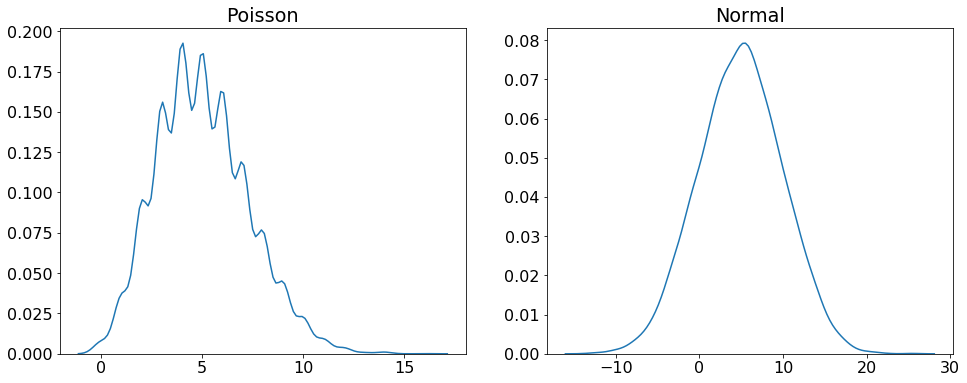

In [17]:
#@title Comparing Gaussian and Poisson distributions

#@markdown Pick a mean value and we will simulate what the distribution looks like for Poisson and Gaussian distributions over 10,000 observations

mean_value = 5 #@param {type:"slider", min:0, max:100, step:5}
std_for_gaussian = 5 #@param {type:"slider", min:0, max:50, step:5}

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy as scy

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

def get_CI(array_of_numbers, ci=95):
    median_value = np.median(array_of_numbers)
    ci_frac = (100 - ci) / 2
    percentiles = np.percentile(array_of_numbers, [ci_frac, 100 - ci_frac])
    return median_value, percentiles[0], percentiles[1]

poisson_values = np.random.poisson(mean_value, 10000)
gaussian_values= np.random.normal(mean_value, std_for_gaussian, 10000)

fig, ax =plt.subplots(1,2, figsize=(16,6))

sns.kdeplot(poisson_values, ax=ax[0]);
sns.kdeplot(gaussian_values, ax=ax[1]);
ax[0].set_title('Poisson')
ax[1].set_title('Normal')

pois_median, pois_low_ci, pois_high_ci = get_CI(poisson_values)
gauss_median, gauss_low_ci, gauss_high_ci = get_CI(gaussian_values)

data = {'Poisson': [f'{np.mean(poisson_values):.2f}', 
                    f'{pois_median:.2f}', 
                    f'{np.std(poisson_values):.2f}', 
                    f'{pois_low_ci:.2f}-{pois_high_ci:.2f}'], 
        'Normal': [f'{np.mean(gaussian_values):.2f}', 
                    f'{gauss_median:.2f}', 
                    f'{np.std(gaussian_values):.2f}', 
                    f'{gauss_low_ci:.2f}-{gauss_high_ci:.2f}']}

pd.DataFrame.from_dict(data, orient='index', columns=['mean', 'median', 'std', '95%CI'])


**Question: Why does the Poisson distribution look jagged at low mean values?**




**Example 1:**

Imagine we are studying fish behaviour and counting the number of fish that swim into a container. If the average number of fish that swim into a container across all replicates is 2.5 (i.e. $\lambda=2.5$), what is the probability that a container contains __no fish__ at the end of the experiment (i.e. $x=0$)? If a fish is either in or out of a container (i.e. no fractions) and a container can't contain fewer than zero fish, the probability is described by a Poisson distribution.

$$
p(x=0) = \frac{e^{-2.5}2.5^{0}}{0!} = e^{-2.5} = 8\%
$$



<br/><br/><br/>
**Example 2:**
If I have one million bacterial cells, and I want to make sure all of them are infected by at least one virus, how many viruses do I need to add per cell? We can't add fractions of a virus to a cell, nor can we infect with fewer than zero viruses, so the density function is described by a Poisson distribution.

If we add an average of 1 virus per cell, the probability of a cell receiving no viruses is:

$$
p(x=0) = e^{-1} = 37\%
$$

The probability of a cell receiving one virus is:

$$
p(x=1) = \frac{e^{-1}1^{1}}{1!} = 37\%
$$

so the probability of a cell receiving more than one virus must be:

$$
1 - p(x=0) - p(x=1) = 26\%
$$

If I add **10 viruses** per cell: 
$$
p(x=0) = e^{-10} = 4.5 x 10^{-5}
$$

so the probability of having one or more viruses must be 
$$
p(x \ge1) = 1 - p(x=0) = 0.9999546
$$

If I add 10 viruses per cell, then out of one million cells, only 45 are not infected.

It is for this reason that you often see 10 viruses added per cell in most infection studies (this is often described as the __multiplicity of infection__, or __MOI__.


<br/><br/><br/>

## Quickfire Python to plot the relationship between viruses per cell and probability of infection

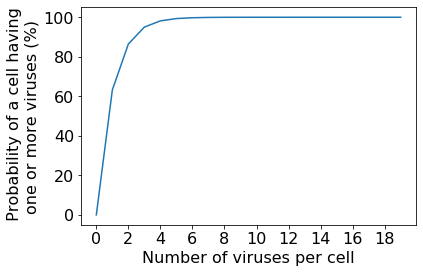

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
viruses_per_cell = np.arange(20)
probability_of_one_or_more_viruses = np.zeros(len(viruses_per_cell))

for i in range(len(viruses_per_cell)):
    probability_of_one_or_more_viruses[i] = (1 - np.exp(-viruses_per_cell[i])) * 100

# the above can also be done in one step with list comprehension:
# probability_of_one_or_more_viruses = [(1 - np.exp(-i)) * 100 for i in viruses_per_cell]


font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
plt.figsize=(16,6)
plt.plot(viruses_per_cell, probability_of_one_or_more_viruses)
plt.xlabel("Number of viruses per cell")
plt.ylabel(" Probability of a cell having\none or more viruses (%)");
plt.xticks(np.arange(0, 20, step=2))
plt.show()

## Exercise

Many important bacteria grow slowly and are outcompeted by fast-growing, but rare taxa in liquid medium. One way round this is to inoculate each well with one cell and then let them grow up without competition. This is known as 'Dilution to Extinction culturing' and is used to get pure cultures of slow growing bacteria. Wells with more than one cell in them are not pure. If I inoculate a 96-well plate with an average of 2 cells per well, how many wells are empty? How many wells have one cell in them? How many wells have more than one cell in them and are thus not pure?

In [15]:
#set the mean number of cells per well, and the number of wells
mean_value = 2
number_of_wells = 96

#calculate probability of p(0)
p_0 = 

#calculate how many wells are likely to be empty
num_empty = p_0 * number_of_wells

#print the result
print(f'The average number of empty wells is: {num_empty:.2f}')


#calculate the porbability of more than one cell in a well
p_not_pure = 


#calculate how many wells are likely to contain more than one cell
num_not_pure = p_not_pure * number_of_wells

#print the result
print(f'The average number of wells that are not pure is: {num_not_pure:.2f}')

The average number of empty wells is: 9.60


# Heteroscedasticity
With count data, variance increases as $\lambda$ increases, as can be seen in the left plot below, where we've used the `np.random.poisson` method to randomly select 40 points with increasing $\lambda$ values. This is a problem when using models that assume variance is equal in different regions of the data space. It is, however, easy to fix: We know that for Poisson data, the standard deviation is the square root of the mean so we can apply a simple transformation on the data by square rooting the values. Once this is done, the variance of the data is now equal across all values of $\lambda$, as seen in the right plot.

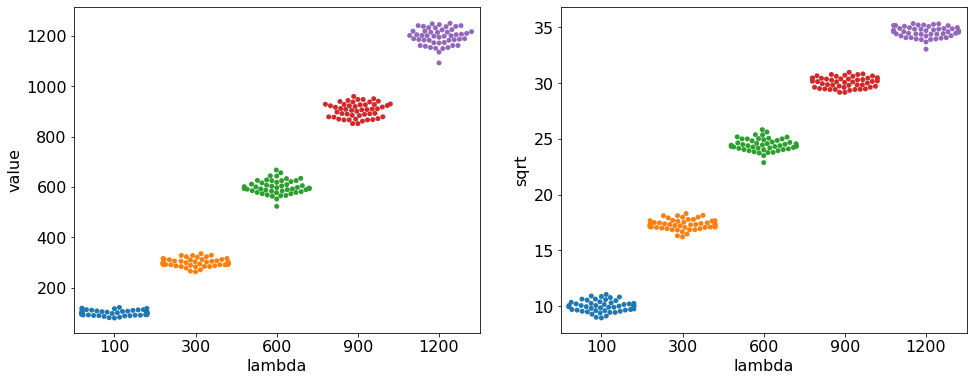

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

records = []

lambdas = [100, 300, 600, 900, 1200]
for l in lambdas:
    for p in np.random.poisson(l, 50):
        records.append((l, p, np.sqrt(p)))

df = pd.DataFrame(records, columns=['lambda', 'value', 'sqrt'])
fig, ax =plt.subplots(1,2, figsize=(16,6))

sns.swarmplot(x="lambda", y="value", data=df, ax=ax[0])
sns.swarmplot(x="lambda", y="sqrt", data=df, ax=ax[1])
plt.show()